# Feature extraction

## 1. Fast Fourier Transform

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

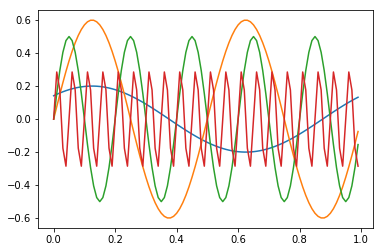

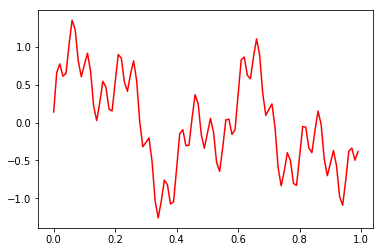

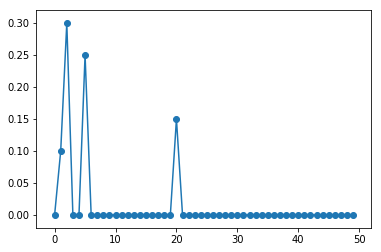

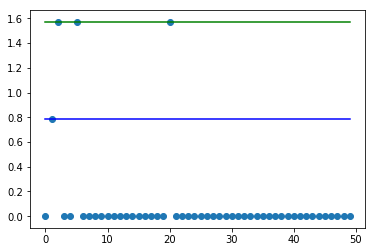

In [2]:
sampling_rate = 0.01
t = np.arange(0.0, 1.0, sampling_rate)
n = len(t)

#sint= 0.2 * np.sin(2*np.pi*t)
sint= 0.2 * np.sin(2*np.pi*t + 0.25 * np.pi)
sin2t = 0.6 *np.sin(2*np.pi*2*t)
sin5t = 0.5 * np.sin(2*np.pi*5*t)
sin20t = 0.3 * np.sin(2*np.pi*20*t)

plt.plot(t,sint)
plt.plot(t,sin2t)
plt.plot(t,sin5t)
plt.plot(t,sin20t)
plt.show()

suma = sint+sin2t+sin5t+sin20t
plt.plot(t,suma, color="r")
plt.show()

# time domain gets transformed into complex numbers where abs(complex_num) represents amplitude of sine
# and the angle of the complex_num is phase
X = np.fft.fft(suma) / n
X = X[:int(n/2)]
freq = np.fft.fftfreq(n, sampling_rate)
freq = freq[:int(n/2)]

#plt.plot(freq, X.real, freq, X.imag)

plt.plot(freq, abs(X)) 
plt.scatter(freq, abs(X)) 
plt.show()

X = [z if abs(z) > 0.001 else 0+0j for z in X]
plt.scatter(freq, -np.angle(X))
plt.plot(freq, np.pi/2 * np.ones(freq.shape), color="g")
plt.plot(freq, np.pi/4 * np.ones(freq.shape), color="b")
plt.show()


Text(0,0.5,'|Y(freq)|')

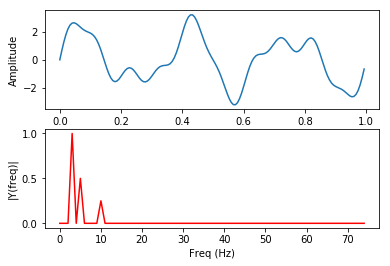

In [3]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y1 = np.sin(2*np.pi*ff*t)

ff = 3
y2 = 2 * np.sin(2*np.pi*ff*t)

ff = 10
y3 = 0.5 * np.sin(2*np.pi*ff*t)

y = y1 + y2 + y3

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs # this is 1.0...

frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

## 2. Wavelet transform

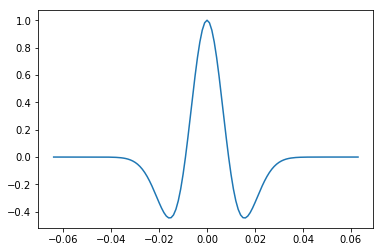

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
def ricker(f, length=0.128, dt=0.001):
    t = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t**2)) * np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y
 
f = 25 # A low wavelength of 25 Hz
t, w = ricker(f)
plt.plot(t,w)

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

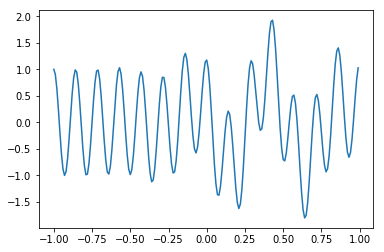

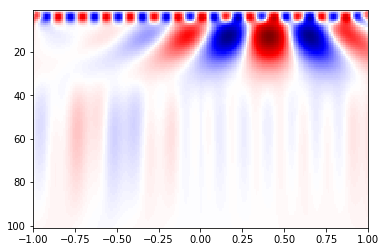

(100, 200)
[[0.12295729 0.82403097 0.49659403 ... 0.03778416 0.41158457 0.88748015]
 [0.69769974 1.43730443 1.60158153 ... 0.61310832 1.30673555 1.37748468]
 [1.34653365 1.81454133 1.83427207 ... 0.48377523 1.18359425 1.40976794]
 ...
 [0.03310154 0.03542595 0.03930442 ... 0.09767505 0.10140385 0.10661486]
 [0.03735335 0.04092967 0.04587782 ... 0.09565018 0.09872692 0.10291087]
 [0.04151624 0.04631736 0.05231108 ... 0.09366634 0.0961029  0.09927848]]


In [22]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
plt.plot(t, sig)
plt.show()

widths = np.arange(1, 101)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 101, 1], cmap='seismic', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#plt.gca().invert_yaxis()
plt.show()

print(cwtmatr.shape)
print(cwtmatr)

#### The Y axis labels must be reversed in above plot! It doesn't make sense

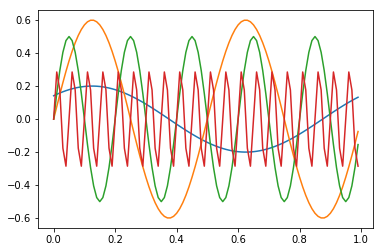

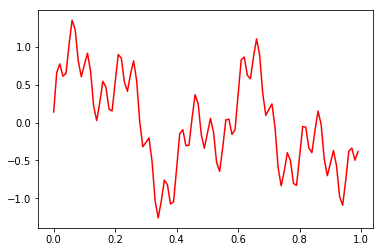

Y axis scale - min: -3.406247381416426 max: 3.406247381416426


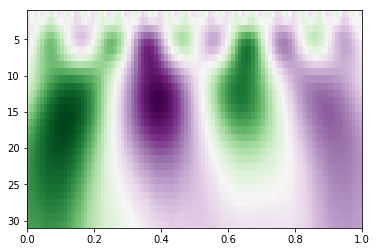

In [21]:
sampling_rate = 0.01
t = np.arange(0.0, 1.0, sampling_rate)
n = len(t)

#sint= 0.2 * np.sin(2*np.pi*t)
sint= 0.2 * np.sin(2*np.pi*t + 0.25 * np.pi)
sin2t = 0.6 *np.sin(2*np.pi*2*t)
sin5t = 0.5 * np.sin(2*np.pi*5*t)
sin20t = 0.3 * np.sin(2*np.pi*20*t)

plt.plot(t,sint)
plt.plot(t,sin2t)
plt.plot(t,sin5t)
plt.plot(t,sin20t)
plt.show()

suma = sint+sin2t+sin5t+sin20t
plt.plot(t ,suma, color="r")
plt.show()

widths = np.arange(1, 31)
cwtmatr = signal.cwt(suma, signal.ricker, widths)
cwtrmatr_max = abs(cwtmatr).max() 
cwtrmatr_min = -abs(cwtmatr).max()
print("Y axis scale - min:", cwtrmatr_min, "max:", cwtrmatr_max)
plt.imshow(cwtmatr, extent=[0, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#plt.matshow(cwtmatr)
plt.show()



# Playing around with sample data

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

        timestamps     TP9     AF7     AF8    TP10  Right AUX
0     1.532069e+09 -31.250  54.199  82.031 -38.574      7.324
1     1.532069e+09 -45.410  56.152  82.031 -49.316    135.742
2     1.532069e+09 -52.246  56.641  86.426 -53.711     99.609
3     1.532069e+09 -55.176  52.734  91.797 -57.617    -48.828
4     1.532069e+09 -59.570  58.105  88.867 -61.035    -30.273
5     1.532069e+09 -61.035  68.848  83.496 -65.918     90.332
6     1.532069e+09 -61.035  70.312  82.520 -65.430     96.680
7     1.532069e+09 -67.871  62.500  84.473 -66.406    -33.691
8     1.532069e+09 -69.824  56.152  82.520 -70.312   -104.004
9     1.532069e+09 -59.570  61.035  79.102 -64.453     45.898
10    1.532069e+09 -51.758  68.359  76.660 -53.223    135.254
11    1.532069e+09 -54.199  62.500  69.336 -52.246     20.020
12    1.532069e+09 -49.805  57.617  63.965 -50.781    -94.238
13    1.532069e+09 -28.809  53.711  59.570 -36.133    -15.625
14    1.532069e+09 -18.555  41.992  52.734 -24.414    142.578
15    1.

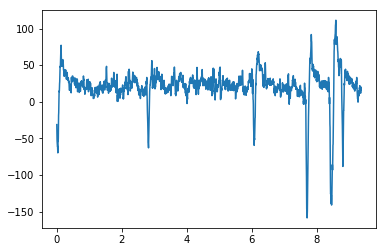

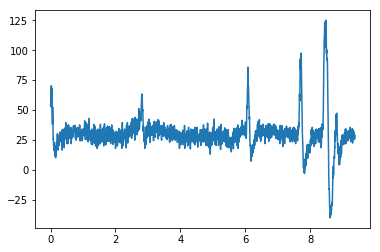

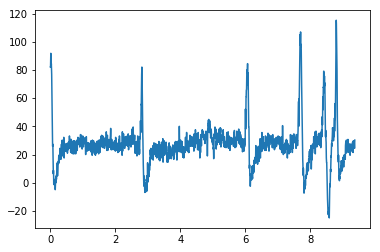

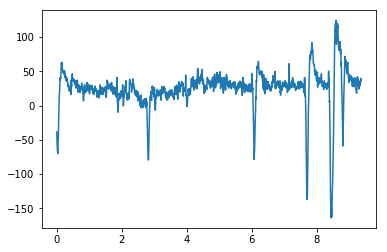

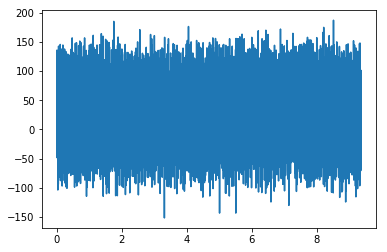

In [4]:
data = pd.read_csv("Sample data.csv")
print(data)
print(data.values)

timestamps = data.values[:,0]
timestamps -= timestamps[0]

plot_how_many = len(timestamps)
#plot_how_many = 200

for i in range(1, data.values.shape[1]):
    plt.plot(timestamps[:plot_how_many], data.values[:plot_how_many, i])
    plt.show()

## FFT

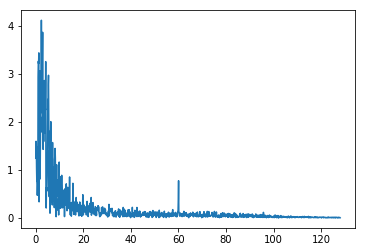

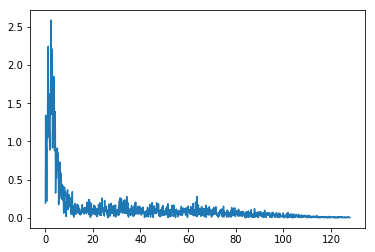

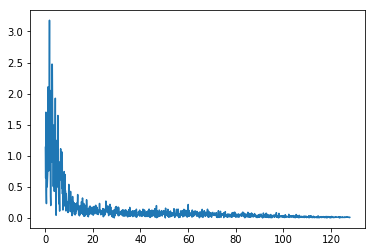

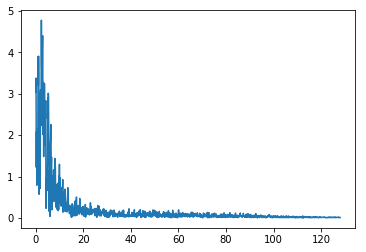

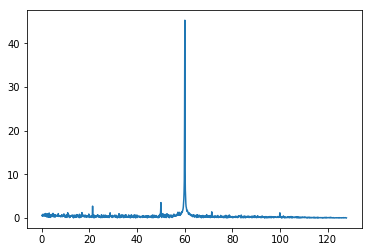

In [23]:
sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n = len(timestamps)

# time domain gets transformed into complex numbers where abs(complex_num) represents amplitude of sine
# and the angle of the complex_num is phase
X = np.fft.fft(data.values[:,1:], axis=0) / n
X = X[:int(n/2),:]
freq = np.fft.fftfreq(n, sampling_rate)
freq = freq[:int(n/2)]

# A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs.
# Then A[1:n/2] contains the positive-frequency terms,
# and A[n/2+1:] contains the negative-frequency terms, in order of decreasingly negative frequency

for i in range(data.values.shape[1] - 1):
    plt.plot(freq[1:], abs(X[1:,i])) 
    #plt.scatter(freq[1:], abs(X[1:,i])) 
    plt.show()

    #X = [z if abs(z) > 0.001 else 0+0j for z in X]
    #plt.scatter(freq, -np.angle(X))
    #plt.plot(freq, np.pi/2 * np.ones(freq.shape), color="g")
    #plt.plot(freq, np.pi/4 * np.ones(freq.shape), color="b")
    #plt.show()

## Wavelet transform

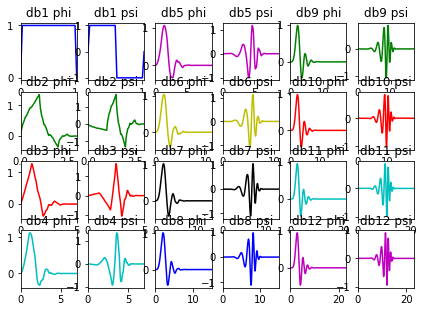

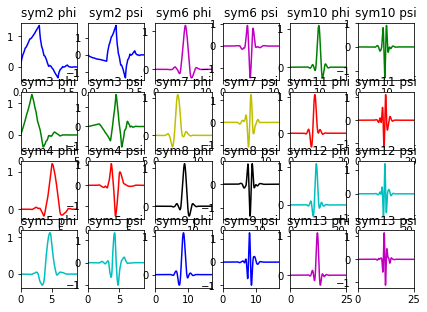

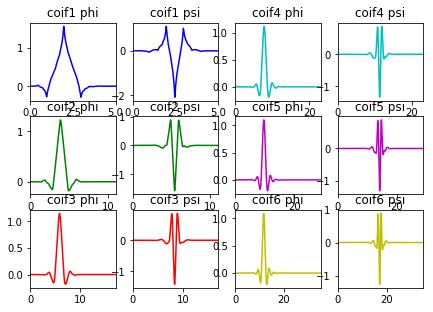

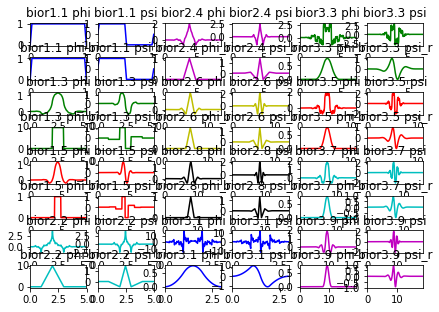

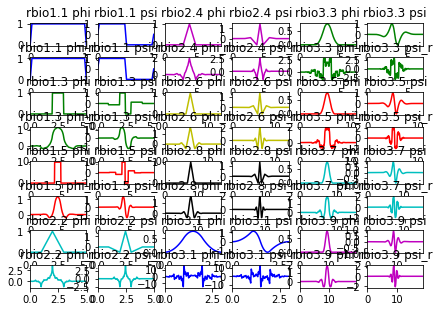

In [63]:
import itertools

import matplotlib.pyplot as plt

import pywt


plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))

plt.show()

In [38]:
 pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

### Ricker (mexican hat) wavelet

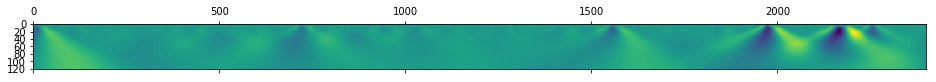

Y axis scale - min: -695.5248659103241 max: 695.5248659103241


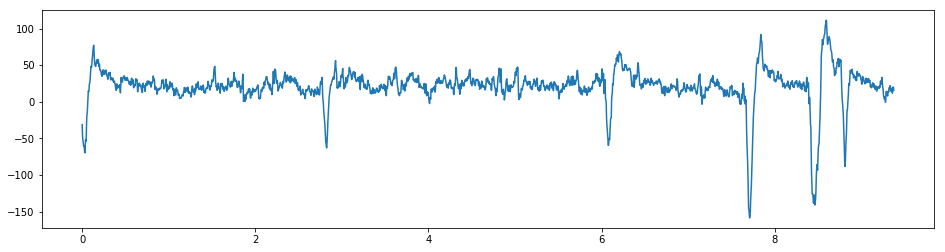

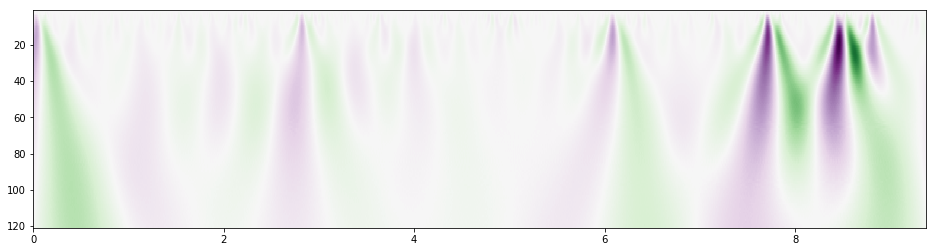

In [58]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'mexh', sampling_period=sampling_rate)

#print(coef.shape, freqs.shape)
#print(freqs)

plt.matshow(coef)
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(coef, extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

### Morlet wavelet

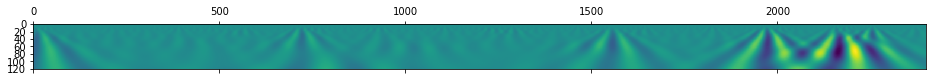

Y axis scale - min: -578.7911964038126 max: 578.7911964038126


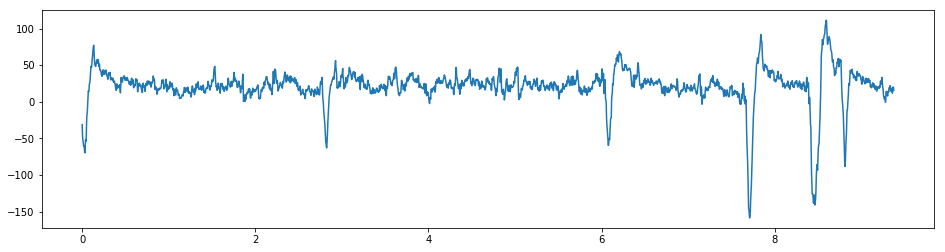

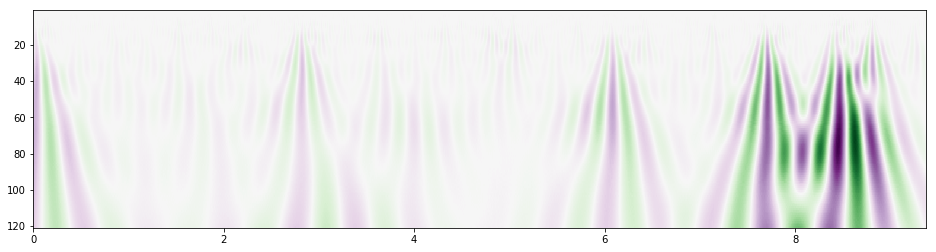

In [56]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'morl', sampling_period=sampling_rate)

#print(coef.shape, freqs.shape)
#print(freqs)

plt.matshow(coef)
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(coef, extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

### Gaussian wavelet

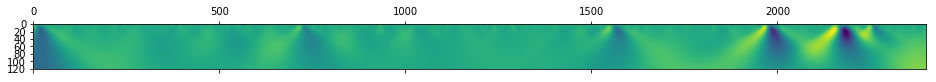

Y axis scale - min: -718.4358161523719 max: 718.4358161523719


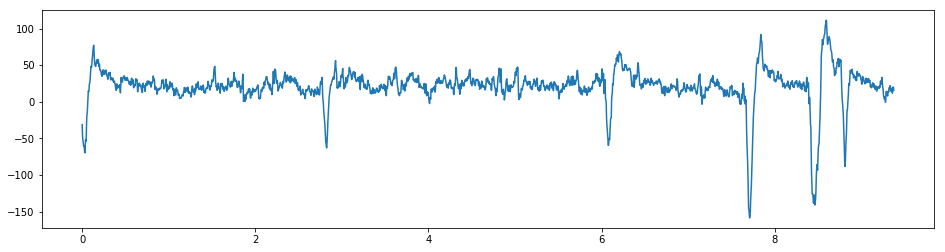

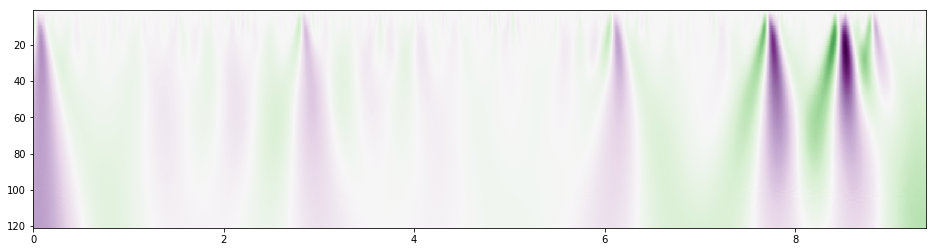

In [57]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'gaus1', sampling_period=sampling_rate)

#print(coef.shape, freqs.shape)
#print(freqs)

plt.matshow(coef)
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(coef, extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

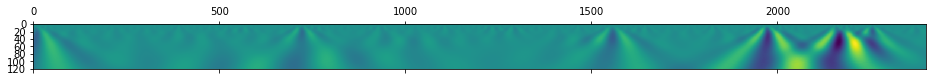

Y axis scale - min: -637.8506810882424 max: 637.8506810882424


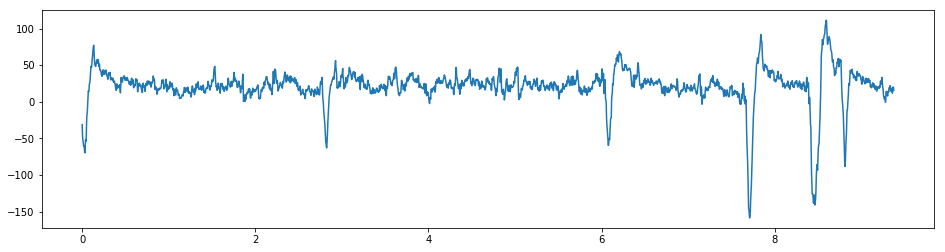

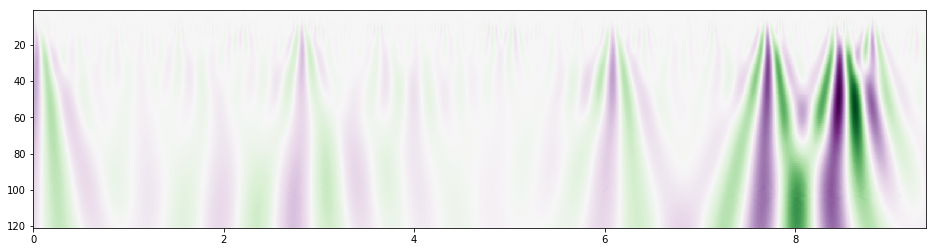

In [59]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'gaus6', sampling_period=sampling_rate)

#print(coef.shape, freqs.shape)
#print(freqs)

plt.matshow(coef)
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(coef, extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

### Playground

(120, 2400) (120,)
[128.          64.          42.66666667  32.          25.6
  21.33333333  18.28571429  16.          14.22222222  12.8
  11.63636364  10.66666667   9.84615385   9.14285714   8.53333333
   8.           7.52941176   7.11111111   6.73684211   6.4
   6.0952381    5.81818182   5.56521739   5.33333333   5.12
   4.92307692   4.74074074   4.57142857   4.4137931    4.26666667
   4.12903226   4.           3.87878788   3.76470588   3.65714286
   3.55555556   3.45945946   3.36842105   3.28205128   3.2
   3.12195122   3.04761905   2.97674419   2.90909091   2.84444444
   2.7826087    2.72340426   2.66666667   2.6122449    2.56
   2.50980392   2.46153846   2.41509434   2.37037037   2.32727273
   2.28571429   2.24561404   2.20689655   2.16949153   2.13333333
   2.09836066   2.06451613   2.03174603   2.           1.96923077
   1.93939394   1.91044776   1.88235294   1.85507246   1.82857143
   1.8028169    1.77777778   1.75342466   1.72972973   1.70666667
   1.68421053   1.66233766   1.

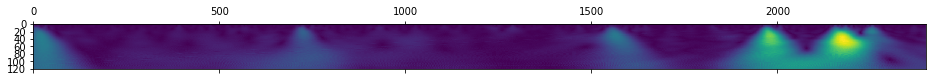

Y axis scale - min: -590.2390125615194 max: 590.2390125615194


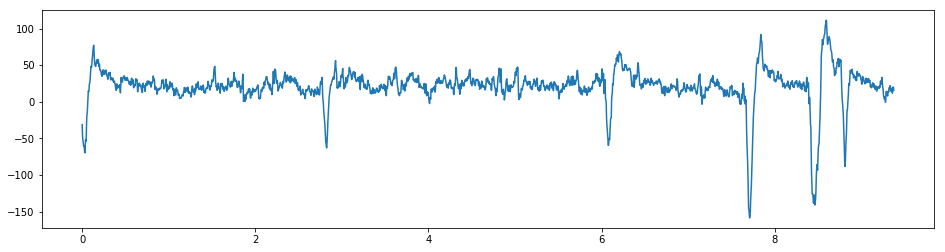

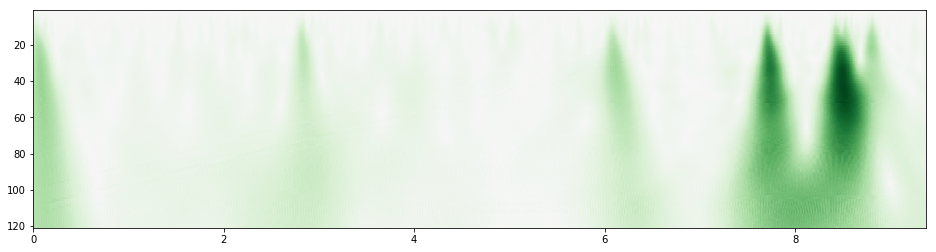

In [61]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'fbsp', sampling_period=sampling_rate)

print(coef.shape, freqs.shape)
print(freqs)
print(coef[0])
plt.matshow(abs(coef))
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(abs(coef), extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

(120, 2400) (120,)
[198.4         99.2         66.13333333  49.6         39.68
  33.06666667  28.34285714  24.8         22.04444444  19.84
  18.03636364  16.53333333  15.26153846  14.17142857  13.22666667
  12.4         11.67058824  11.02222222  10.44210526   9.92
   9.44761905   9.01818182   8.62608696   8.26666667   7.936
   7.63076923   7.34814815   7.08571429   6.84137931   6.61333333
   6.4          6.2          6.01212121   5.83529412   5.66857143
   5.51111111   5.36216216   5.22105263   5.08717949   4.96
   4.83902439   4.72380952   4.61395349   4.50909091   4.40888889
   4.31304348   4.2212766    4.13333333   4.04897959   3.968
   3.89019608   3.81538462   3.74339623   3.67407407   3.60727273
   3.54285714   3.48070175   3.42068966   3.36271186   3.30666667
   3.25245902   3.2          3.14920635   3.1          3.05230769
   3.00606061   2.96119403   2.91764706   2.87536232   2.83428571
   2.7943662    2.75555556   2.71780822   2.68108108   2.64533333
   2.61052632   2.5766233

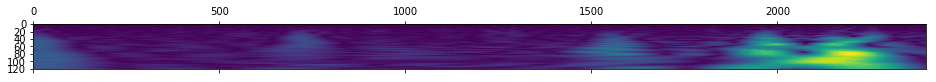

Y axis scale - min: -429.2154284332299 max: 429.2154284332299


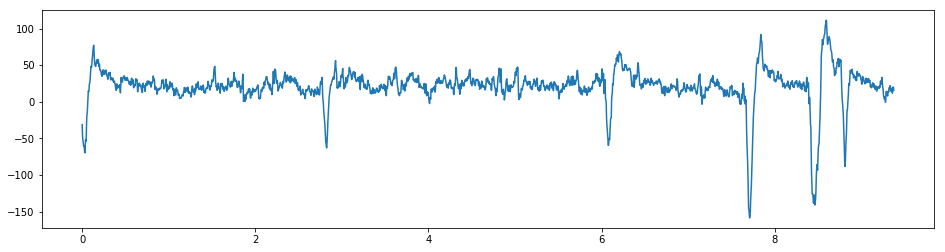

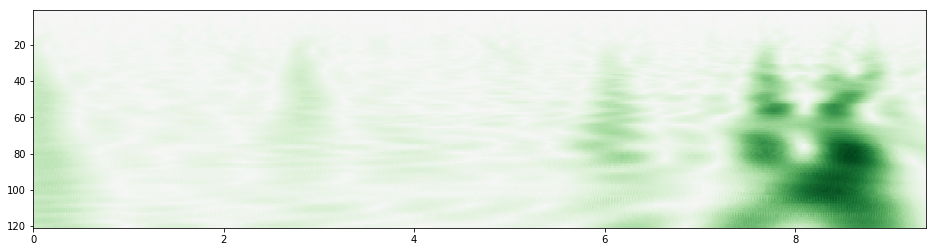

In [62]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'shan', sampling_period=sampling_rate)

print(coef.shape, freqs.shape)
print(freqs)
print(coef[0])
plt.matshow(abs(coef))
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(abs(coef), extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

### Complex Morlet

(120, 2400) (120,)
[128.          64.          42.66666667  32.          25.6
  21.33333333  18.28571429  16.          14.22222222  12.8
  11.63636364  10.66666667   9.84615385   9.14285714   8.53333333
   8.           7.52941176   7.11111111   6.73684211   6.4
   6.0952381    5.81818182   5.56521739   5.33333333   5.12
   4.92307692   4.74074074   4.57142857   4.4137931    4.26666667
   4.12903226   4.           3.87878788   3.76470588   3.65714286
   3.55555556   3.45945946   3.36842105   3.28205128   3.2
   3.12195122   3.04761905   2.97674419   2.90909091   2.84444444
   2.7826087    2.72340426   2.66666667   2.6122449    2.56
   2.50980392   2.46153846   2.41509434   2.37037037   2.32727273
   2.28571429   2.24561404   2.20689655   2.16949153   2.13333333
   2.09836066   2.06451613   2.03174603   2.           1.96923077
   1.93939394   1.91044776   1.88235294   1.85507246   1.82857143
   1.8028169    1.77777778   1.75342466   1.72972973   1.70666667
   1.68421053   1.66233766   1.

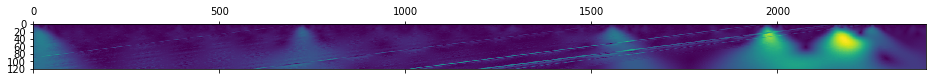

Y axis scale - min: -317.50311934133686 max: 317.50311934133686


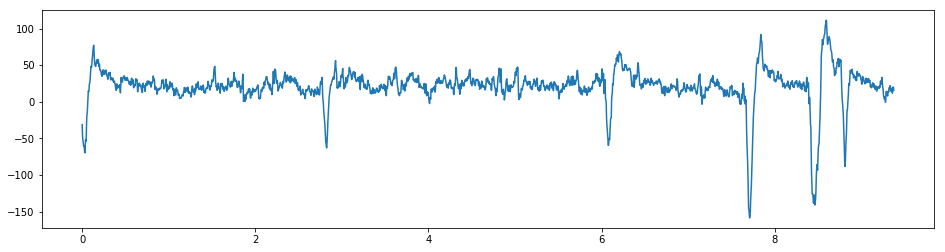

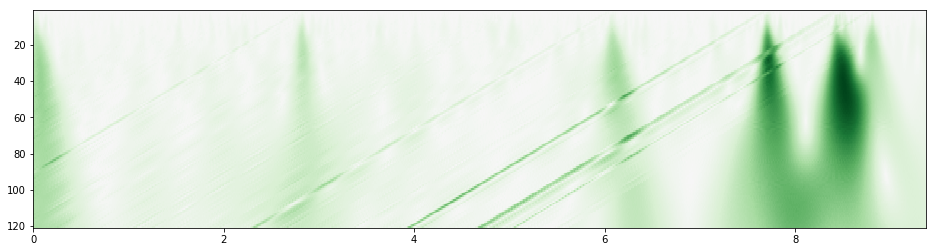

In [66]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n_scales = 120
n = len(timestamps)

scales = np.arange(1, n_scales + 1)
coef, freqs = pywt.cwt(data.values[:,1], scales, 'cmor', sampling_period=sampling_rate)

print(coef.shape, freqs.shape)
print(freqs)
print(coef[0])
plt.matshow(abs(coef))
plt.show()

coef_max = abs(coef).max() 
coef_min = -abs(coef).max()
print("Y axis scale - min:", coef_min, "max:", coef_max)

plt.figure(figsize=(16,4))
plt.plot(timestamps, data.values[:,1])
plt.show()
plt.figure(figsize=(16,4))
plt.imshow(abs(coef), extent=[0, timestamps[-1], n_scales + 1, 1], cmap='PRGn', aspect='auto', 
           vmax=coef_max, vmin=coef_min)
plt.show()

# Classifying stuff

In [3]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [9]:
def split_recording(data, interval_duration):
    n_points = data.values.shape[0]
    sampling_freq = 256 # 256 times per second
    points_per_interval = sampling_freq * interval_duration
    offset = 32
    
    n_intervals = int(n_points / points_per_interval)
    
    return np.array([data.values[i * points_per_interval + j : (i + 1) * points_per_interval + j, :] for i in range(n_intervals) for j in range(0, points_per_interval, offset) if (i + 1) * points_per_interval + j <= data.values.shape[0]])

### Loading left hand data

         timestamps     TP9     AF7     AF8    TP10  Right AUX
0      1.532215e+09  10.742  34.180  28.809  13.672    192.871
1      1.532215e+09  16.602  36.133  29.785  15.137    -70.312
2      1.532215e+09  12.207  34.180  32.715  14.160   -190.430
3      1.532215e+09   9.277  30.273  30.762  13.672     66.895
4      1.532215e+09  19.043  28.320  25.879  15.625    197.754
5      1.532215e+09  25.391  32.715  22.949  12.695     14.160
6      1.532215e+09  25.879  37.109  16.113  11.230   -159.668
7      1.532215e+09  24.902  34.668  12.695  11.230    -21.973
8      1.532215e+09  25.879  29.785  17.578   3.906    205.566
9      1.532215e+09  23.438  28.809  19.043   0.488     94.727
10     1.532215e+09  23.926  30.762  19.531   1.953   -148.438
11     1.532215e+09  27.344  33.203  20.508   7.812    -52.734
12     1.532215e+09  24.414  33.691  20.020   5.859    198.730
13     1.532215e+09  27.344  29.785  21.484  -0.488    186.035
14     1.532215e+09  31.250  30.762  22.461   3.906    

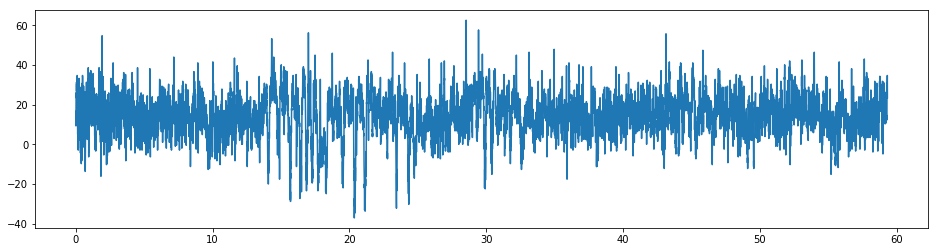

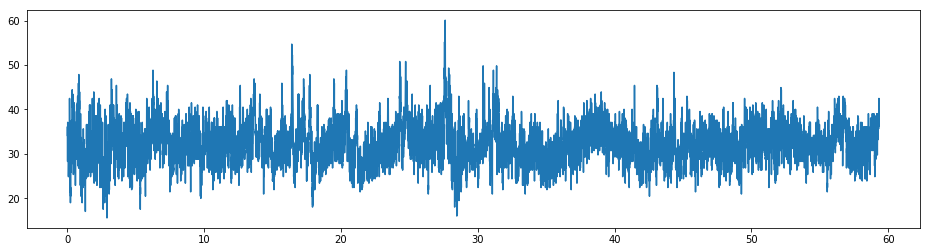

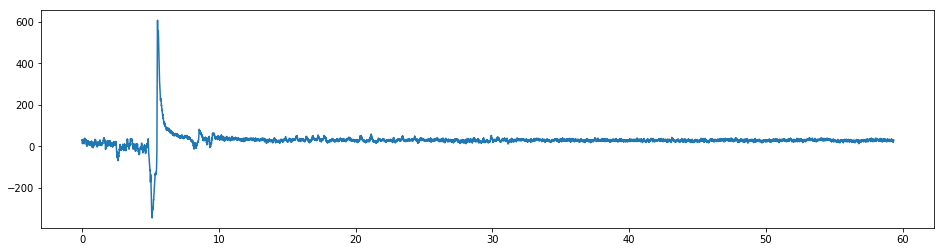

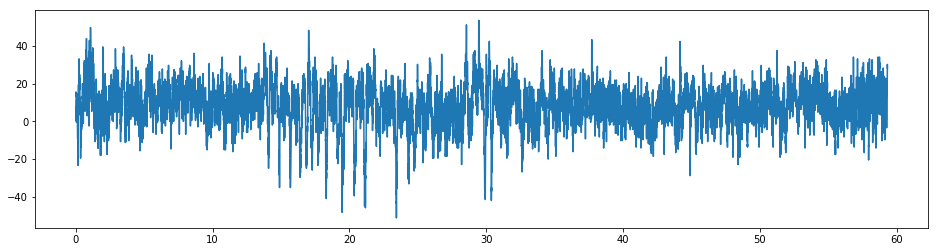

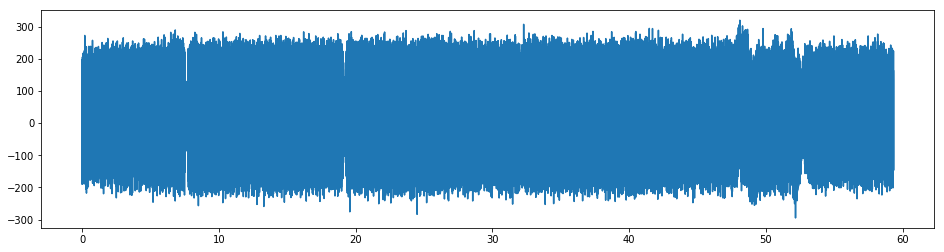

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#data = pd.read_csv("left_fist_clench_unclench.csv")
#data = pd.read_csv("idle.csv")
#data = pd.read_csv("Sample data.csv")
#data = pd.read_csv("right_fist_clench_unclench.csv")
#data = pd.read_csv("idle_2.csv")
data = pd.read_csv("left_fist_clench_unclench_2.csv")

print(data)
print(data.values)

timestamps = data.values[:,0]
timestamps -= timestamps[0]

plot_how_many = len(timestamps)
#plot_how_many = 200

for i in range(1, data.values.shape[1]):
    plt.figure(figsize=(16,4))
    plt.plot(timestamps[:plot_how_many], data.values[:plot_how_many, i])
    plt.show()

In [118]:
split_data = split_recording(data, 2)
print(split_data.shape)

(459, 512, 6)


In [57]:
np.sum(4 * np.arange(1,9))

144

In [41]:
#Z = np.array([[[1,2,3],[4,5,6]],[[4,5,2],[3,7,1]]])

#Z.min(axis=2, keepdims=True)
Z = np.array([[1,2,3],[4,5,6]])
print(Z)
(Z - np.mean(Z, axis=0, keepdims=True)) / np.std(Z, axis=0, keepdims=True)

[[1 2 3]
 [4 5 6]]


array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [119]:
sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
n = split_data.shape[1]

freq = np.fft.fftfreq(n, sampling_rate)
freq = freq[:int(n/2)]

fft_transformed = []

for i in range(split_data.shape[0]):
    data_point = split_data[i, :, 1:split_data.shape[2]-1] # ignoring timestamps and Right AUX
    
    # time domain gets transformed into complex numbers where abs(complex_num) represents amplitude of sine
    # and the angle of the complex_num is phase
    X = np.fft.fft(data_point, axis=0) / n
    X = X[:int(n/2),:]
    X = abs(X)
    
    #STANDARDIZE HERE
    X = (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True)
    
    fft_transformed.append(X.reshape(-1)) # Reshaping to have 2D matrix

fft_transformed = np.array(fft_transformed)
print("fft transformed shape", fft_transformed.shape)

fft transformed shape (459, 1024)


In [53]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
print(digits.data.shape)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

(1797, 64)


In [64]:
left_hand_data = fft_transformed

In [120]:
left_hand_data2 = fft_transformed

In [81]:
right_hand_data = fft_transformed

In [60]:
idle_data = fft_transformed

In [115]:
idle_data2 = fft_transformed

In [75]:
other_idle_data = fft_transformed
other_idle_labels = np.zeros(other_idle_data.shape[0])

In [82]:
total_data = np.concatenate((left_hand_data , right_hand_data, idle_data))
total_data.shape
total_labels = np.concatenate((np.ones(left_hand_data.shape[0]), 2*np.ones(right_hand_data.shape[0]), np.zeros(idle_data.shape[0])))
total_labels

array([1., 1., 1., ..., 0., 0., 0.])

In [123]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS

n_dimensions = 10
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, n_components=n_dimensions)
X_kpca = kpca.fit_transform(total_data)
X_back = kpca.inverse_transform(X_kpca)

isomap = Isomap(n_components=n_dimensions)
X_isomap = isomap.fit_transform(total_data)

X_train, X_test, y_train, y_test = train_test_split(X_isomap, total_labels,
                                                    train_size=0.75, test_size=0.25)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=3)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

29 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Generation 1 - Current Pareto front scores:


-1	0.9265231461938933	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=1.0, ExtraTreesClassifier__min_samples_leaf=9, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)


-2	0.9274611884996012	ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.55, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=16, ExtraTreesClassifier__min_samples_split=16, ExtraTreesClassifier__n_estimators=100)


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Generation 2 - Current Pareto front scores:


-1	0.9265231461938933	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=1.0, ExtraTreesClassifier__min_samples_leaf=9, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)


-2	0.9274611884996012	ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.55, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=16, ExtraTreesClassifier__min_samples_split=16, ExtraTreesClassifier__n_estimators=100)


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Generation 3 - Current Pareto front scores:


-1	0.9265231461938933	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=1.0, ExtraTreesClassifier__min_samples_leaf=9, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)


-2	0.9284273720744807	ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.45, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=16, ExtraTreesClassifier__min_samples_split=16, ExtraTreesClassifier__n_estimators=100)


-3	0.9294076262839454	GaussianNB(RandomForestClassifier(SelectFwe(input_matrix, SelectFwe__alpha=0.015), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=7, RandomForestClassifier__n_estimators=100))


Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Generation 4 - Current Pareto front scores:


-1	0.9265231461938933	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=1.0, ExtraTreesClassifier__min_samples_leaf=9, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)


-2	0.9284273720744807	ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.45, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=16, ExtraTreesClassifier__min_samples_split=16, ExtraTreesClassifier__n_estimators=100)


-3	0.9294076262839454	GaussianNB(RandomForestClassifier(SelectFwe(input_matrix, SelectFwe__alpha=0.015), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.45, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=7, RandomForestClassifier__n_estimators=100))


Generation 5 - Current Pareto front scores:


-1	0.9265231461938933	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=1.0, ExtraTreesClassifier__min_samples_leaf=9, ExtraTreesClassifier__min_samples_split=7, ExtraTreesClassifier__n_estimators=100)


-2	0.9284273720744807	ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.45, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=16, ExtraTreesClassifier__min_samples_split=16, ExtraTreesClassifier__n_estimators=100)


-3	0.9303597392242391	ExtraTreesClassifier(GradientBoostingClassifier(MinMaxScaler(input_matrix), GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.55, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.8500000000000001), ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.55, ExtraTreesClassifier__min_samples_leaf=16, ExtraTreesClassifier__min_samples_split=16, ExtraTreesClassifier__n_estimators=100)


0.9217391304347826


True

In [125]:
#print(pipeline_optimizer.score(X_test, y_test))
#print(total_data.shape)

pipeline_optimizer.score(isomap.transform(left_hand_data2), np.ones(left_hand_data2.shape[0]))
pipeline_optimizer.predict(isomap.transform(right_hand_data))
#rl = np.ones(right_hand_data.shape[0])
#pipeline_optimizer.score(right_hand_data, rl)

array([2., 0., 0., 2., 2., 0., 0., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [108]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS


n_dimensions = 10
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, n_components=n_dimensions)
X_kpca = kpca.fit_transform(total_data)
X_back = kpca.inverse_transform(X_kpca)

pca = PCA(n_components=n_dimensions)
X_pca = pca.fit_transform(total_data)

isomap = Isomap(n_components=n_dimensions)
X_isomap = isomap.fit_transform(total_data)


In [109]:
X_isomap.shape


(1379, 10)

# Somewhat cleaner code

In [11]:
import numpy as np
import pandas as pd
import os

def split_recording(data, interval_duration, step_size=32):
    n_points = data.values.shape[0]
    sampling_freq = 256 # 256 times per second
    points_per_interval = sampling_freq * interval_duration
    
    n_intervals = int(n_points / points_per_interval)
    
    return np.array([data.values[i * points_per_interval + j : (i + 1) * points_per_interval + j, :] for i in range(n_intervals) for j in range(0, points_per_interval, step_size) if (i + 1) * points_per_interval + j <= data.values.shape[0]])

def load_data(path, class_names, is_directory=False, interval_seconds=2, step_size=32):
    data = []
    labels = []
    
    data_files = []
    if is_directory:
        data_files = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith(".csv")]
    else:
        if not path.lower().endswith(".csv"):
            raise Exception("File is not a CSV file!")
        data_files = [path]
        
    for file in data_files:
        batch = pd.read_csv(file)
        split_data = split_recording(batch, interval_seconds, step_size) # Extracting 2 second intervals from the recorded data
        
        data.append(split_data)
        
        class_id = class_names.index("_".join(os.path.basename(file).split("_")[:-1]))
        labels.append(class_id * np.ones(split_data.shape[0]))
    
    data = np.concatenate(data)
    labels = np.concatenate(labels)

    return data, labels
       
    

In [36]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, TSNE, SpectralEmbedding
import matplotlib.pyplot as plt


def run_FFT(X, sampling_rate=(1.0/256)):
    n = X.shape[1]
    freq = np.fft.fftfreq(n, sampling_rate)
    #freq = freq[1:int(n/2)] # we only care about positive frequencies, starting from n/2 + 1 there are negative freqs and 0 is a sum of the signal
    freq = freq[1:int(n/4)] # let's take only frequencies up to about 60Hz
    print(freq.shape, freq.max())
    
    fft_transformed = []

    for i in range(X.shape[0]): # THIS CAN BE OPTIMIZED IN NUMPY
        data_point = X[i,:,:]

        # time domain gets transformed into complex numbers where abs(complex_num) represents amplitude of sine
        # and the angle of the complex_num is phase
        transformed = np.fft.fft(data_point, axis=0) / n
        #transformed = transformed[1:int(n/2),:]
        transformed = transformed[1:int(n/4),:] # let's take only frequencies up to about 60Hz
        transformed = abs(transformed) # Let's take the powers of the frequencies, ignore shifts for now
        
        # the below makes 128 features
        #n_band_intervals = 8
        #interval_starts = np.cumsum(4 * np.arange(0,n_band_intervals))
        #interval_ends = np.concatenate([interval_starts[1:], [transformed.shape[0]]])
        
        # the below makes 96 features
        #interval_starts = [0, 4, 12, 22, 44, 70]
        #interval_ends = [4, 12, 22, 44, 70, transformed.shape[0]]
        
        # the below makes 64 features
        interval_starts = [0, 8, 24, 40]
        interval_ends = [8, 24, 40, transformed.shape[0]]

        bands_stats = [np.array([band_interval.min(axis=0), band_interval.max(axis=0), band_interval.mean(axis=0), band_interval.std(axis=0)]) 
                       for band_interval 
                       in [transformed[interval_starts[i]:interval_ends[i], :] 
                           for i in range(len(interval_starts))]]
        
        # Statistics from equal length band intervals
        #band_interval_width = 8
        #bands_stats = [np.array([band_interval.min(axis=0), band_interval.max(axis=0), band_interval.mean(axis=0), band_interval.std(axis=0)]) 
        #               for band_interval 
        #               in [transformed[i*band_interval_width:min((i+1)*band_interval_width, transformed.shape[0]), :] 
        #                   for i in range(int(np.ceil(transformed.shape[0]/band_interval_width)))]]
        
        bands_stats = np.concatenate(bands_stats)
        
        #print(bands_stats.shape)
        
        #print("Min:", transformed.min(), "Max:", transformed.max())
        fft_transformed.append(bands_stats)

    fft_transformed = np.array(fft_transformed)
    print("fft transformed shape", fft_transformed.shape)
    
    return fft_transformed, freq

def standardize_data(X, X_mean=None, X_std=None):
    print("Standardizing data")
    if X_mean is None or X_std is None:
        X_mean = X.mean(axis=(0,1), keepdims=True)
        X_std = X.std(axis=(0,1), keepdims=True)
    print("X max", X.max(), "X min", X.min(), "X mean", X_mean, "X std", X_std)
    return (X - X_mean) / X_std, X_mean, X_std

def normalize_data(X, X_min=None, X_max=None):
    print("Normalizing data")
    if X_min is None or X_max is None:
        X_min = X.min(axis=0, keepdims=True)
        X_max = X.max(axis=0, keepdims=True)
    return (X - X_min) / (X_max - X_min), X_min, X_max

def reduce_dimensions(X, dim_reducer=None, n_dimensions=20):
    if dim_reducer is None:
        print("Dimensionality reducer is None! Initializing a new one")
        #dim_reducer = Isomap(n_components=n_dimensions)
        dim_reducer = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, n_components=n_dimensions)
        #dim_reducer = TSNE(n_components=n_dimensions, init='pca', random_state=0)
        #dim_reducer = LocallyLinearEmbedding(n_neighbors=16, n_components=n_dimensions, method='standard')
        dim_reducer.fit(X)
    print("Min:", X.min(), "Max:", X.max())
    X = dim_reducer.transform(X)
    print("Shape after cutting to", n_dimensions, "dimensions:", X.shape)
    print("Min:", X.min(), "Max:", X.max())
    return X, dim_reducer

def preprocess_data(X, Y, X_mean=None, X_std=None, n_dimensions=20, dim_reducer=None):
    np.random.seed(0)
    random_order = np.random.permutation(X.shape[0])
    X = X[random_order]
    Y = Y[random_order]
    X = X[:,:,1:-1] # Discarding first and last columns (Timestamps and right AUX)
    
    sampling_rate = 1.0/256 # 256Hz -> default sampling rate on 2016 Muse
    n = X.shape[1]

    # Run FFT
    X, frequencies = run_FFT(X, sampling_rate=sampling_rate)
    
    # Standardization
    #X, X_mean, X_std = standardize_data(X, X_mean, X_std)
    
    X = X.reshape((-1, X.shape[1] * X.shape[2])) # Reshaping because we want to have a 2D matrix
    print("Shape after standardization and reshaping to 2D:", X.shape)
    
    return X, Y, X_mean, X_std, dim_reducer
    
    # Reduce dimensionality
    X, dim_reducer = reduce_dimensionality(X, dim_reducer, n_dimensions)
    
    return X, Y, X_mean, X_std, dim_reducer



In [13]:
X, Y = load_data("data/fist_clenching/", ["idle", "right_fist", "left_fist"], is_directory=True, interval_seconds=2, step_size=32)
X, Y, X_mean, X_std, dim_reducer = preprocess_data(X, Y, n_dimensions=50)

test_X, test_Y = load_data("data", ["idle", "right_fist", "left_fist"], is_directory=True, interval_seconds=2, step_size=32)
test_X, test_Y, _, _, _ = preprocess_data(test_X, test_Y, X_mean=X_mean, X_std=X_std, dim_reducer=dim_reducer, n_dimensions=50)

Y_onehot = np.zeros((len(Y), n_classes))
Y_onehot[np.arange(len(Y)), Y.astype(int)] = 1
Y = Y_onehot
test_Y_onehot = np.zeros((len(test_Y), n_classes))
test_Y_onehot[np.arange(len(test_Y)), test_Y.astype(int)] = 1
test_Y = test_Y_onehot

(127,) 63.5
fft transformed shape (11942, 16, 4)
Shape after standardization and reshaping to 2D: (11942, 64)


In [14]:
test_X, test_Y = load_data("data", ["idle", "right_fist", "left_fist"], is_directory=True, interval_seconds=2, step_size=32)
test_X, test_Y, _, _, _ = preprocess_data(test_X, test_Y, X_mean=X_mean, X_std=X_std, dim_reducer=dim_reducer, n_dimensions=50)


(127,) 63.5
fft transformed shape (1377, 16, 4)
Shape after standardization and reshaping to 2D: (1377, 64)


In [15]:
Y_onehot = np.zeros((len(Y), n_classes))
Y_onehot[np.arange(len(Y)), Y.astype(int)] = 1
Y = Y_onehot
test_Y_onehot = np.zeros((len(test_Y), n_classes))
test_Y_onehot[np.arange(len(test_Y)), test_Y.astype(int)] = 1
test_Y = test_Y_onehot

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=3)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
print(pipeline_optimizer.score(test_X, test_Y))
pipeline_optimizer.export('tpot_exported_pipeline.py')


30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  21%|██▌         | 25/120 [15:19<35:17, 22.29s/pipeline]

In [64]:

Z = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(Z)
#print((Z - Z.mean(axis=(0,1), keepdims=True)) / Z.std(axis=(0,1)))
#Z.reshape((-1, Z.shape[1] * Z.shape[2]))

band_interval_width = 1

A = np.array([np.min(Z[:,i*band_interval_width:min((i+1)*band_interval_width, Z.shape[1]), :], axis=1, keepdims=True) for i in range(int(np.ceil(Z.shape[1]/band_interval_width)))])
B = np.array([np.max(Z[:,i*band_interval_width:min((i+1)*band_interval_width, Z.shape[1]), :], axis=1, keepdims=True) for i in range(int(np.ceil(Z.shape[1]/band_interval_width)))])
C = np.array([np.mean(Z[:,i*band_interval_width:min((i+1)*band_interval_width, Z.shape[1]), :], axis=1, keepdims=True) for i in range(int(np.ceil(Z.shape[1]/band_interval_width)))])
D = np.array([np.std(Z[:,i*band_interval_width:min((i+1)*band_interval_width, Z.shape[1]), :], axis=1, keepdims=True) for i in range(int(np.ceil(Z.shape[1]/band_interval_width)))])
print(A)
print(A.shape)
interval_starts = np.cumsum(4 * np.arange(0,8))
interval_ends = np.concatenate([interval_starts[1:], [127]])
print(interval_starts)
print(interval_ends)


#np.sum([a[:,::n] for i in xrange(n)], 0)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[[ 1  2  3]]

  [[ 7  8  9]]]


 [[[ 4  5  6]]

  [[10 11 12]]]]
(2, 2, 1, 3)
[  0   4  12  24  40  60  84 112]
[  4  12  24  40  60  84 112 127]


In [6]:
from sklearn import svm
clf = svm.SVC(kernel="rbf", gamma = 0.1)
clf.fit(X, Y)
clf.score(X,Y)

0.8472703814208532

In [7]:
clf.score(test_X, test_Y)

0.4001452432824982

## Neural networks

In [16]:
def batch_generator(X, Y, batch_size=100):
	idx = 0
	dataset_size = X.shape[0]
	indices = np.random.permutation(dataset_size)
	while idx < dataset_size:
		chunk = slice(idx, idx+batch_size)
		chunk = indices[chunk]
		chunk = sorted(chunk)
		idx = idx + batch_size
		yield X[chunk], Y[chunk]

In [38]:
import tensorflow as tf

# VGG - na razie się bawię
n_classes = 3
weight_decay = 0.0005
bias_initial_value = 0.01
dropout_rate = 0.20

# ignore this, this is a copy paste from my other project
channels1 = 32
channels2 = 64
channels3 = 128
channels4 = 256


x = tf.placeholder('float', [None, X.shape[1]])
y = tf.placeholder('float')
is_training = tf.placeholder('bool', shape=[])

def parametric_relu(input_, name):
    alpha = tf.get_variable(
        name=name + '_alpha', 
        shape=input_.get_shape()[-1],
        initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.3),
        dtype=tf.float32)
    pos = tf.nn.relu(input_)
    neg = alpha * (input_ - tf.abs(input_)) * 0.5
    return pos + neg

def pool_layer(input_data, pool_size):
    return tf.layers.max_pooling2d(
        inputs=input_data, 
        pool_size=pool_size, 
        strides=2,
        padding="valid")

def fully_connected_layer(name, input_data, units, dropout=True, batch_norm=False):
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        layer = tf.layers.dense(
            inputs=input_data,
            units=units,
            #kernel_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False),
            #bias_initializer=tf.ones_initializer(),
            bias_initializer=tf.constant_initializer(bias_initial_value),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay),
            bias_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay))

        #layer = parametric_relu(layer, name + "_prelu_fc") 
        layer = tf.nn.relu(layer)
        if batch_norm:
            layer = tf.layers.batch_normalization(inputs=layer, training=is_training)
        if dropout:
            layer = tf.layers.dropout(inputs=layer, rate=dropout_rate, training=is_training)

        return layer

def vgg_layer(name, input_data, channels):
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        # Convolutional layer #1
        layer = tf.layers.conv2d(
            inputs=input_data,
            filters=channels1,
            kernel_size=3,
            strides=1,
            padding="same",
            #kernel_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False),
            #bias_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
            #bias_initializer=tf.ones_initializer(),
            #bias_initializer=tf.constant_initializer(bias_initial_value),
            bias_initializer=tf.zeros_initializer(),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay),
            bias_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay))

        layer = parametric_relu(layer, name + "_prelu1")

        layer = tf.layers.conv2d(
            inputs=layer,
            filters=channels1,
            kernel_size=3,
            strides=1,
            padding="same",
            #kernel_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False),
            #bias_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
            #bias_initializer=tf.ones_initializer(),
            #bias_initializer=tf.constant_initializer(bias_initial_value),
            bias_initializer=tf.zeros_initializer(),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay),
            bias_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay))

        layer = parametric_relu(layer, name + "_prelu2")

        # Pooling layer #1
        layer = tf.layers.max_pooling2d(
            inputs=layer, 
            pool_size=2, 
            strides=2,
            padding="valid")

        layer = tf.layers.dropout(inputs=layer, rate=dropout_rate, training=is_training)
        layer = parametric_relu(layer, name + "_prelu3")
        #layer = tf.layers.batch_normalization(inputs=layer, training=is_training)

        return layer

def vgg_model_compact(input_data):
    vgg1 = vgg_layer("vgg1", input_data, channels1)
    vgg2 = vgg_layer("vgg2", vgg1, channels2)
    vgg3 = vgg_layer("vgg3", vgg2, channels3)
    vgg4 = vgg_layer("vgg4", vgg3, channels4)
    
    pool1 = pool_layer(vgg1, 8)
    pool2 = pool_layer(vgg2, 4)
    pool3 = pool_layer(vgg3, 2)
    
    pool1_flat = tf.contrib.layers.flatten(pool1)
    pool2_flat = tf.contrib.layers.flatten(pool2)
    pool3_flat = tf.contrib.layers.flatten(pool3)
    vgg4_flat = tf.contrib.layers.flatten(vgg4)
    
    total = tf.concat([pool1_flat, pool2_flat, pool3_flat, vgg4_flat], axis=1)
    
    fc1 = fully_connected_layer("fc1", total, 1024)
    fc2 = fully_connected_layer("fc2", fc1, 512)
    
    output = tf.layers.dense(
        inputs=fc2, 
        units=n_classes,
        #kernel_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
        kernel_initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False),
        #bias_initializer=tf.ones_initializer(),
        bias_initializer=tf.zeros_initializer(),
        kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay),
        bias_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay))

    return output

def brainwave_mlp_model(input_data):
    fc1 = fully_connected_layer("fc1", input_data, 2048, dropout=False, batch_norm=False)
    fc2 = fully_connected_layer("fc2", fc1, 2048, dropout=False, batch_norm=False)
    fc3 = fully_connected_layer("fc3", fc2, 2048, dropout=False, batch_norm=False)
    
    output = tf.layers.dense(
        inputs=fc3, 
        units=n_classes,
        #kernel_initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05),
        kernel_initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False),
        #bias_initializer=tf.ones_initializer(),
        bias_initializer=tf.zeros_initializer(),
        kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay),
        bias_regularizer=tf.contrib.layers.l2_regularizer(scale=weight_decay))
    
    return output
    


In [39]:
# With dropout
def train_vgg(x, neural_network_model, num_epochs, batch_size):
    with tf.variable_scope(tf.get_variable_scope(), reuse=tf.AUTO_REUSE) as scope:
        prediction = neural_network_model(x)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))
        loss += tf.losses.get_regularization_loss()
        optimizer = tf.train.AdamOptimizer().minimize(loss)

        #update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        #with tf.control_dependencies(update_ops):
        #    optimizer = optimizer.minimize(loss, global_step=tf.train.get_global_step())

        config = tf.ConfigProto()
        config.gpu_options.per_process_gpu_memory_fraction = 0.6
        with tf.Session(config=config) as sess:
            sess.run(tf.global_variables_initializer())   

            for epoch_cnt in range(num_epochs):
                epoch_loss = 0

                for epoch_x, epoch_y in batch_generator(X, Y, batch_size):                
                    _, c = sess.run([optimizer, loss], feed_dict = {x: epoch_x, y: epoch_y, is_training: True})
                    epoch_loss += c

                correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
                accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

                #epoch_validation_accuracy = 0.0
                #for epoch_x, epoch_y in batch_generator(test_data, 'valid', batch_size): 
                #    epoch_validation_accuracy += accuracy.eval({x: epoch_x, y: epoch_y, is_training: False}) * epoch_x.shape[0]
                #epoch_validation_accuracy /= test_data["X_valid"].shape[0]

                predicted_labels = []
                epoch_test_accuracy = 0.0
                for epoch_x, epoch_y in batch_generator(test_X, test_Y, batch_size): 
                    epoch_test_accuracy += accuracy.eval({x: epoch_x, y: epoch_y, is_training: False}) * epoch_x.shape[0]
                    predicted_labels.append(prediction.eval({x: epoch_x, y: epoch_y, is_training: False}))
                epoch_test_accuracy /= test_X.shape[0]
                predicted_labels = np.concatenate(predicted_labels)
                #print(predicted_labels)

                print('Epoch', epoch_cnt + 1, '/', num_epochs, 'Loss:', epoch_loss, "Test:", epoch_test_accuracy)
                #print('Epoch', epoch_cnt + 1, '/', num_epochs, 'Loss:', epoch_loss, "Validation:", epoch_validation_accuracy, "Test:", epoch_test_accuracy)

In [45]:
X, Y = load_data("data/fist_clenching/", ["idle", "right_fist", "left_fist"], is_directory=True, interval_seconds=2, step_size=32)
X, Y, X_mean, X_std, dim_reducer = preprocess_data(X, Y, n_dimensions=50)

test_X, test_Y = load_data("data", ["idle", "right_fist", "left_fist"], is_directory=True, interval_seconds=2, step_size=32)
test_X, test_Y, _, _, _ = preprocess_data(test_X, test_Y, X_mean=X_mean, X_std=X_std, dim_reducer=dim_reducer, n_dimensions=50)

X, X_min, X_max = normalize_data(X)
print(X.shape, X_min.shape, X_max.shape)
test_X, _, _ = normalize_data(test_X, X_min, X_max)
print(test_X.shape)

Y_onehot = np.zeros((len(Y), n_classes))
Y_onehot[np.arange(len(Y)), Y.astype(int)] = 1
Y = Y_onehot
test_Y_onehot = np.zeros((len(test_Y), n_classes))
test_Y_onehot[np.arange(len(test_Y)), test_Y.astype(int)] = 1
test_Y = test_Y_onehot

(127,) 63.5
fft transformed shape (11942, 16, 4)
Shape after standardization and reshaping to 2D: (11942, 64)
(127,) 63.5
fft transformed shape (1377, 16, 4)
Shape after standardization and reshaping to 2D: (1377, 64)
Normalizing data
(11942, 64) (1, 64) (1, 64)
Normalizing data
(1377, 64)


In [ ]:
train_vgg(x, brainwave_mlp_model, 100, 1000)

Epoch 1 / 100 Loss: 46.93640398979187 Test: 0.7196804530913188
Epoch 2 / 100 Loss: 38.225138902664185 Test: 0.6572258617017437
Epoch 3 / 100 Loss: 32.56452012062073 Test: 0.7741466760635376
Epoch 4 / 100 Loss: 28.123891592025757 Test: 0.7225853402543605
Epoch 5 / 100 Loss: 24.767106890678406 Test: 0.7719680626234804
Epoch 6 / 100 Loss: 22.148662328720093 Test: 0.7676107439773189
Epoch 7 / 100 Loss: 20.351013779640198 Test: 0.7973856224300382
Epoch 8 / 100 Loss: 18.694733142852783 Test: 0.6971677648216031
Epoch 9 / 100 Loss: 17.420517325401306 Test: 0.7995642616684747
Epoch 10 / 100 Loss: 16.36631453037262 Test: 0.7835874905513522
Epoch 11 / 100 Loss: 15.475980401039124 Test: 0.7676107290436932
Epoch 12 / 100 Loss: 14.64565885066986 Test: 0.7269426362187255
Epoch 13 / 100 Loss: 13.971360564231873 Test: 0.7051561180889043
Epoch 14 / 100 Loss: 13.453556537628174 Test: 0.7973856198761717
Epoch 15 / 100 Loss: 12.82630980014801 Test: 0.7879448085049399
Epoch 16 / 100 Loss: 12.32210499048233 